# Getting the necessary data

You just need to do this only once

In [1]:
!rm -f genotypes.vcf.gz 2>/dev/null
!tabix -fh ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/release/20130502/supporting/vcf_with_sample_level_annotation/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5_extra_anno.20130502.genotypes.vcf.gz 22:1-17000000|bgzip -c > genotypes.vcf.gz
!tabix -p vcf genotypes.vcf.gz

In [2]:
from collections import defaultdict

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import vcf

/home/tiago/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tiago/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
v = vcf.Reader(filename='genotypes.vcf.gz')

print('Variant Level information')
infos = v.infos
for info in infos:
    print(info)

print('Sample Level information')
fmts = v.formats
for fmt in fmts:
    print(fmt)

Variant Level information
CIEND
CIPOS
CS
END
IMPRECISE
MC
MEINFO
MEND
MLEN
MSTART
SVLEN
SVTYPE
TSD
AC
AF
NS
AN
ASN_AF
EUR_AF
AFR_AF
AMR_AF
SAN_AF
DP
Sample Level information
GT
DP


In [4]:
v = vcf.Reader(filename='genotypes.vcf.gz')
rec = next(v)
print(rec.CHROM, rec.POS, rec.ID, rec.REF, rec.ALT, rec.QUAL, rec.FILTER)
print(rec.INFO)
print(rec.FORMAT)
samples = rec.samples
print(len(samples))
sample = samples[0]
print(sample.called, sample.gt_alleles, sample.is_het, sample.is_variant, sample.phased)
print(int(sample['DP']))

22 16050075 None A [G] 100 []
{'NS': 2504, 'SAN_AF': [0.0], 'AN': 5008, 'AF': [0.000199681], 'AMR_AF': [0.0], 'EAS_AF': [''], 'DP': [8012], 'EUR_AF': [0.0], 'ASN_AF': [0.0], 'SAS_AF': ['0.0010'], 'AC': [1], 'AFR_AF': [0.0]}
GT:DP
2504
True ['0', '0'] False False True
1


In [5]:
f = vcf.Reader(filename='genotypes.vcf.gz')

my_type = defaultdict(int)
num_alts = defaultdict(int)

for rec in f:
    my_type[rec.var_type, rec.var_subtype] += 1
    if rec.is_snp:
        num_alts[len(rec.ALT)] += 1
print(my_type)
print(num_alts)

defaultdict(<class 'int'>, {('sv', 'DEL'): 6, ('indel', 'del'): 273, ('snp', 'ts'): 10054, ('indel', 'ins'): 127, ('snp', 'tv'): 5917, ('sv', 'CNV'): 2, ('snp', 'unknown'): 79, ('sv', 'SVA'): 1, ('indel', 'unknown'): 13})
defaultdict(<class 'int'>, {1: 15971, 2: 79})


In [6]:
f = vcf.Reader(filename='genotypes.vcf.gz')

sample_dp = defaultdict(int)
for rec in f:
    if not rec.is_snp or len(rec.ALT) != 1:
        continue
    for sample in rec.samples:
        dp = sample['DP']
        if dp is None:
            dp = 0
        dp = int(dp)
        sample_dp[dp] += 1

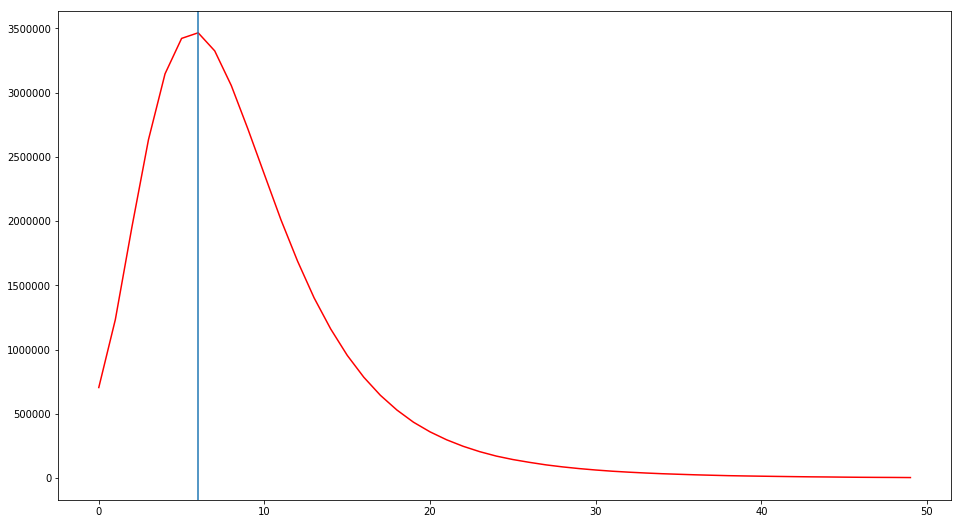

In [7]:
dps = list(sample_dp.keys())
dps.sort()
dp_dist = [sample_dp[x] for x in dps]
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(dp_dist[:50], 'r')
ax.axvline(dp_dist.index(max(dp_dist)))